# <b>Programming For Data Analysis Assignment</b>
# numpy.random package explored

## Some general requirements as mentioned in videos
Include comparison of PCG64 (new version of seed random generator - https://numpy.org/doc/stable/reference/random/generator.html?highlight=pcg64) vs. Mersenne Twister (https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState)


In [72]:
#Setup import for remaining notebook
import numpy as np
import matplotlib.pyplot as plt

# 1. Explaining the Overall Purpose of the numpy.random package
## Overview
The numpy.random package allows us to generate pseudo random numbers in Python for performing a variety of different functions, from basics like simply adding randomness to some script for picking a random name to more complex scientific usage like for generating a sequence of numbers to represent a type of distibution.

The small caveat with the numpy.random package is that the numbers generated are not truly random but are generated based off some seed value, so it merely gives the illusion of randomness, however for most purposes pseudo random is sufficient.
One of the advantages of pseudo random numbers is that by providing the same seed, the output will consistent and in some cases this will be important if you want to test on a reproducable set of random numbers.

## Functionality within numpy.random
Broadly, the numpy.random package can be broken up in the following categories, which I will start to explore in the preceeding cells:
- <b>Simple Random Data</b>
        - When you just want simple random data like picking between several options, a random value between two numbers or random bytes.
- <b>Permutations</b>
        - When you have a preexisting set of values you want to change the order of.
- <b>Distributions</b>
        - Produce a variety of different random distributions, such as exponential, logarithmic, normal, uniform etc.

### Simple Random Data

In [ ]:
#Taking a list of str values for colour and printing a random choice taken 3 times
colour_list = ["red", "green", "yellow"]
print(f"randomly picking from colour_list we get - {np.random.choice(colour_list)}, {np.random.choice(colour_list)}, {np.random.choice(colour_list)}")

### Permutations
For permutations in numpy.random we have the functions <b>shuffle</b> and <b>permutation</b>.
<b>Shuffle</b> performs its operation in place, so whatever object you pass into np.random.shuffle() is changed.
<b>Permutation</b> performs its operation on a copy of the object passed to it, so in practice you would set some variable equal to your np.random.permutation() operation to retain it.


See the next cell for an example of both.

In [70]:
#Declare a simple list that is already ordered
my_list = [1,2,3,4,5,6,7,8,9,10]
print("my_list before it is shuffled:",my_list) #print the list
my_permu_list = np.random.permutation(my_list) #perform permutation, assign variable to result
print("my_list after permutation:",my_list) #print original my_list, show it has not changed
print("my_permu_list:", my_permu_list) #print the permutation list
np.random.shuffle(my_list) #perform shuffle on my_list
print("my_list after shuffle:", my_list) #finally show my_list again, now it has changed

my_list before it is shuffled: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_list after permutation: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_permu_list: [ 3  2  8  6  7  1 10  4  9  5]
my_list after shuffle: [9, 3, 4, 10, 7, 1, 2, 5, 8, 6]


### Distributions
With numpy.random.unform it produces a numpy array of numbers, when supplying the arguments below of low=0, high=10 and size=100 this gives us an array of 100 numbers uniformly distributed from 0 to 10.

Below I play around with this and show the larger the array, the more uniform the histogram ends up looking and therefore the more uniform the distribution is.

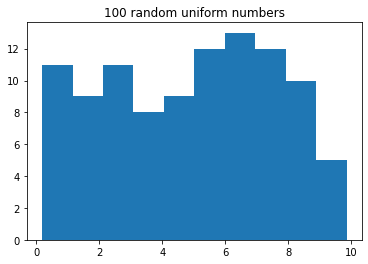

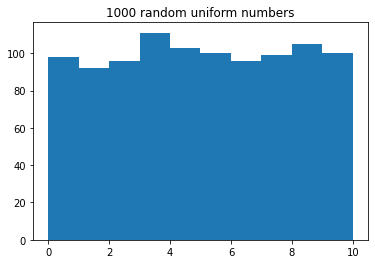

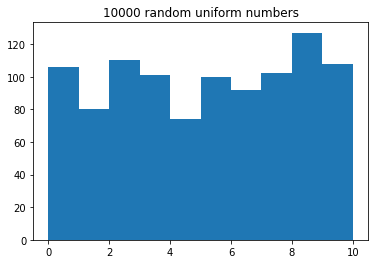

In [73]:
# Using matplotlib.pyplot to show histograms showing output from random.uniform with varying size of array
rand_uniform = np.random.uniform(low=0,high=10,size=100)
plt.hist(rand_uniform)
plt.title("100 random uniform numbers")
plt.show()
rand_uniform = np.random.uniform(low=0,high=10,size=1000)
plt.hist(rand_uniform)
plt.title("1000 random uniform numbers")
plt.show()
rand_uniform = np.random.uniform(low=0,high=10,size=1000)
plt.hist(rand_uniform)
plt.title("10000 random uniform numbers")
plt.show()


With numpy.random.normal it produces a numpy array of normal numbers, when supplying the arguments below of loc=10,and size=100 this gives us an array of 100 numbers normally distributed around 10.

Below I play around with this and show the larger the array, the more normal the histogram ends up looking and therefore the more normal the distribution is.

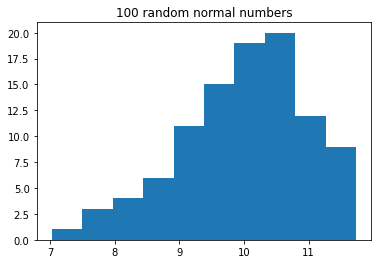

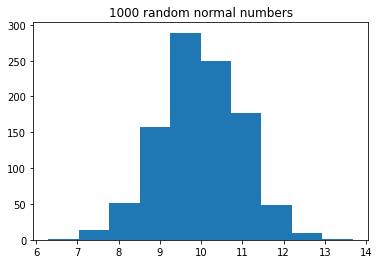

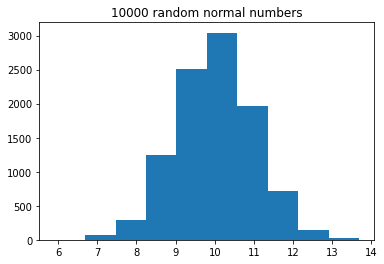

In [74]:
# Using matplotlib.pyplot to show histograms showing output from random.uniform with varying size of array
rand_normal = np.random.normal(loc=10,size=100)
plt.hist(rand_normal)
plt.title("100 random normal numbers")
plt.show()
rand_normal = np.random.normal(loc=10,size=1000)
plt.hist(rand_normal)
plt.title("1000 random normal numbers")
plt.show()
rand_normal = np.random.normal(loc=10,size=10000)
plt.hist(rand_normal)
plt.title("10000 random normal numbers")
plt.show()

The above examples demonstrating picking a random choice from a list of given options, producing a uniform distribution or producing a random normal distribution are all applications that have realy world usages, where someone may want to produce a random distribution to test some model or may want a randomised effect to happen when a script is ran




# Scrap Work

In [71]:
random_num = np.random.rand() #simple random number example generated from numpy
print(random_num)

0.6822430973036724


In [5]:
random_array = np.random.rand(10)
print(random_array)

[0.87251868 0.36150967 0.01585576 0.30721515 0.36264412 0.73033937
 0.39989654 0.03064979 0.47912429 0.76701994]


In [6]:
normal_dist_size = 1000 #creating a array of normal random numbers to view with a histogram
random_norm = np.random.normal(size=normal_dist_size)

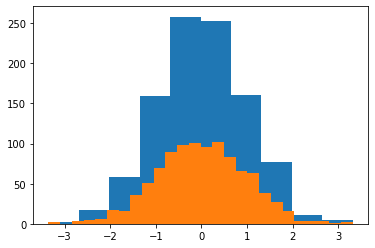

In [7]:
#here comparing normal distributions with varying number of bins, first using default argument, second using 'auto' for bin argument
plt.hist(random_norm)
plt.hist(random_norm, bins='auto')
plt.show()

Trying formula for picking bin size from Stack Overflow post
https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram

Formula

R(n^(1/3))/(3.49σ)

where

    R is the range of data (in your case R = 3-(-3)= 6),

    n is the number of samples,

    σ is your standard deviation.


In [8]:
range_norm = max(random_norm)-min(random_norm)
n = normal_dist_size
stdev = np.std(random_norm)

bin_formula = range_norm*(n**(1/3))/(3.49*stdev)

(array([  2.,   0.,   3.,   5.,   6.,  17.,  16.,  36.,  51.,  69.,  90.,
         98., 101.,  96., 102.,  83.,  66.,  63.,  38.,  27.,  16.,   4.,
          4.,   4.,   1.,   2.]),
 array([-3.35720619, -3.10037225, -2.8435383 , -2.58670436, -2.32987041,
        -2.07303647, -1.81620252, -1.55936858, -1.30253463, -1.04570069,
        -0.78886674, -0.5320328 , -0.27519885, -0.01836491,  0.23846904,
         0.49530298,  0.75213693,  1.00897087,  1.26580482,  1.52263876,
         1.77947271,  2.03630665,  2.2931406 ,  2.54997454,  2.80680849,
         3.06364243,  3.32047638]),
 <BarContainer object of 26 artists>)

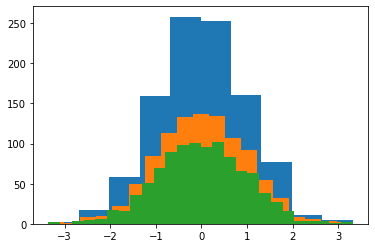

In [9]:
plt.hist(random_norm)

plt.hist(random_norm, bins=int(bin_formula))
plt.hist(random_norm, bins='auto')

